<a href="https://colab.research.google.com/github/flizzer/PythonDataScienceHandbook/blob/main/PythonDataScinceHandbookExperimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Pandas...

In [3]:
data = pd.Series([0.25,0.5,0.75,1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
data[2:4]

2    0.75
3    1.00
dtype: float64

In [7]:
data[::3]

0    0.25
3    1.00
dtype: float64

In [8]:
index = pd.Index([1,2,3,4,5])

In [9]:
index

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [10]:
index[0] = 10

TypeError: ignored

In [11]:
data = pd.Series([0.25,0.5,0.75,1.0],
                 index=['a','b','c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [12]:
'e' in data

False

In [13]:
'c' in data

True

In [14]:
0.25 in data

False

In [15]:
.25 in data

False

In [16]:
data['b']

0.5

In [21]:
data.items

<bound method Series.items of a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64>

In [19]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [23]:
data[data > .75]

d    1.0
dtype: float64

#### Implicit indexing doesn't include the last element:

In [27]:
data[0:2]

a    0.25
b    0.50
dtype: float64

#### Explicit indexing *DOES* include the last element:

In [25]:
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

### Indexer attributes...use these to be explicit about how you're referecing an object's indices.  It helps make your code cleaner.


In [35]:
data_new = pd.Series(['a','b','c'], index=[1,3,5])
data_new

1    a
3    b
5    c
dtype: object

#### `loc` always used the explicit index:

In [37]:
data_new.loc[1]

'a'

#### `iloc` always uses the implicit index:

In [39]:
data_new.iloc[1]

'b'

### Dataframes

In [48]:
area = pd.Series({'California':423967,'Texas':695662,'New York':141297,'Florida':170312,'Illinois':149995})
pop = pd.Series({'California':38332521,'Texas':26448193,'New York':19651127,'Florida':19552860,'Illinois':12882135})
df = pd.DataFrame({'area':area,'pop':pop})
df

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


#### Dictionary-style indexing...

In [49]:
df['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

#### Attribute-style indexing...

In [53]:
df.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [54]:
df.area is df['area']

True

In [55]:
df.pop is df['pop'] #False because the former references a method named pop

False

#### For assignments, its best to use dictionary-style indexing:  (i.e: data['pop'] = z instead of data.pop = z).  Also can be used to add a new column:

In [56]:
df['density'] = df['pop'] / data['area']
df

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [58]:
df.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [59]:
df.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


#### Our friends the index attributes also work with dataframes...

In [60]:
df.iloc[:3,:2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [62]:
df.loc[:'Illinois',:'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


#### NumPy-style access is allowed using any of the index attributes as well...

In [64]:
df.loc[df.density > 100, ['pop','density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [65]:
df.iloc[0,2] = 90
df

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### Clarification:  *Indexing* refers to Columns, *Slicing* refers to Rows

In [68]:
df['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [66]:
df['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


##### Masking operations are interpreted row-wise

In [69]:
df[df.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


## Scikit-Learn...

### Iris dataset...

In [7]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


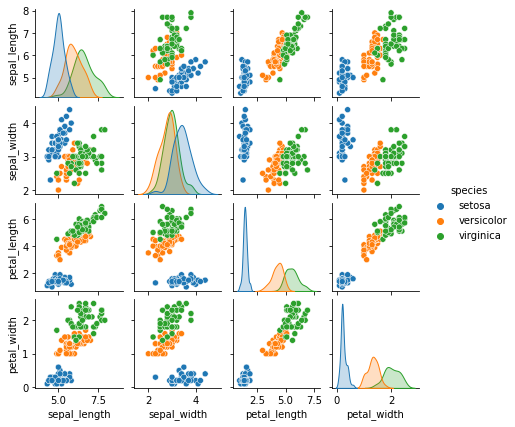

In [8]:
sns.pairplot(iris, hue='species', height=1.5)

In [9]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [10]:
y_iris = iris['species']
y_iris.shape

(150,)

### Linear Regression (Supervised)...

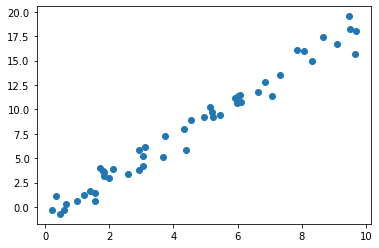

In [19]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)

In [36]:
print(x.shape)
print(type(x))
x

(50,)
<class 'numpy.ndarray'>


array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
X = x[:,np.newaxis] #np.newaxis adds one more dimension (https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it) to make the data conform to [n_samles, n_features]
print(X.shape)
print(type(X))
X

(50, 1)
<class 'numpy.ndarray'>


array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [40]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
model.coef_

array([1.9776566])

In [42]:
model.intercept_

-0.9033107255311146

In [53]:
xfit = np.linspace(-1,11)

In [55]:
xfit.shape

(50,)

In [56]:
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [62]:
Xfit = xfit[:,np.newaxis] #again, make the data conform to [n_samles, n_features]
yfit = model.predict(Xfit)

#### Compare the raw data to the model-fit data and visualize...

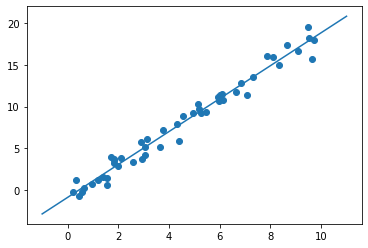

In [68]:
plt.scatter(x,y) #original dataset
plt.plot(xfit,yfit) #model-fit

### Iris classification (Supervised)...

In [11]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_iris, y_iris, random_state=1)

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() #instantiate model
model.fit(Xtrain,ytrain) #fit model to data
y_model = model.predict(Xtest) #predict using test data

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Iris dimensionality (Unsupervised)...